<center><h1>BMIF804</h1>
    <h2>Assignment 2</h2>  
    <h3>By: Hannah Driver (10090525)</h3> </center>

<b>This program reads in a 3D MRI image, calculates its important attributes, up-samples the image volume to a higher resolution with isotropic voxel spacing, and calculates the metadata of the resampled image. The resampled image is then rotated and translated, and viewed in an external 3D Slicer app. Metadata from the external app are compared with what was caluclated in this program, using Simple ITK.</b>

In [22]:
# import libraries
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

<h2>Data Preparation</h2>

In [23]:
def readImage(imageName):
    """
    Read in file to create image object
    :param imageName: name of the file to read in
    :return: image object
    """
    img = sitk.ReadImage(imageName)
    return img

In [24]:
#Specify image to read and name it
img = readImage('intraop_mri_new.nrrd')
img_name = "Intraoperative MRI"

In [25]:
#Set up the 3D Slicer external viewr
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:\\Program Files\\Slicer 4.8.1\\Slicer.exe"
external_viewer.SetApplication(slicer_app_location)

<h2>Part 1</h2>

In [26]:
def image_Info(img,imageName):
    """
    Print important attributes of inputted image, including: size, spacing, origin, direction, and pixel type
    :param img: image object
    :param imageName: user-specified name of image object
    :return: print statement with important attributes from image
    """
    # Get important attributes
    size = img.GetSize() # get size
    spacing = img.GetSpacing() # get spacing
    origin = img.GetOrigin() # get origin
    direction = img.GetDirection() # get direction
    pixel_type = img.GetPixelIDTypeAsString() # get pixel type
    
    # Return the printed attributes
    attributes = print("For image: {}\nThe size is: {}\nThe spacing is: {}\nThe origin is: {}\nThe direction is: {}\nThe pxiel type is: {}\n"
                       .format(imageName,size,spacing,origin,direction,pixel_type))
    return attributes

In [27]:
def imageDimensions(img,imageName):
    """
    Determine the physical extent of an image
    :param img: image object
    :param imageName: user-assigned name of the image object
    :return: print statement with the physical extent of the image, in mm
    """
    #Get image info
    size = img.GetSize() 
    spacing = img.GetSpacing() 
    
    #Calculate image dimensions 
    dim1 = size[0]*spacing[0]
    dim2 = size[1]*spacing[1]
    dim3 = size[2]*spacing[2]

    print("The physical extent of {} image is: {} mm x {} mm x {} mm.".format(imageName,dim1,dim2,dim3))

In [28]:
def transformIndexToPoint(img,imageName):
    """
    Determine the physical extent of an image using Simple ITK's TransformIndexToPhysicalPoint function
    :param img: image object
    :param imageName: user-assigned name of the image object
    :return: print statement with the physical extent of the image, in mm
    """
    origin = img.GetOrigin() #get origin

    end_point = img.TransformIndexToPhysicalPoint((img.GetWidth(),img.GetHeight(),img.GetDepth())) #get farthest points from origin

    dim1 = end_point[0] - origin[0]
    dim2 = end_point[1] - origin[1]
    dim3 = end_point[2] - origin[2]

    print("The physical extent of {} image is: {} mm x {} mm x {} mm.".format(img_name, dim1, dim2, dim3))

In [29]:
def data_resample(image,new_spacing):
    """
    Resample an image with new spacing parameters
    :param image: image object
    :param new_spacing: new voxel spacing parameters
    :return: resampled image object with new spacing parameters
    """   
    #Get image info
    size = img.GetSize() 
    spacing = img.GetSpacing() 
    origin = img.GetOrigin()
    
    #Calculate image dimensions 
    dim1 = int(size[0]*spacing[0] / new_spacing[0])
    dim2 = int(size[1]*spacing[1] / new_spacing[1])
    dim3 = int(size[2]*spacing[2] / new_spacing[2])
    output_size = [dim1,dim2,dim3]
    
    #resample image
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(new_spacing)
    resample.SetSize(output_size)
    resample.SetOutputOrigin(origin)
    resample.SetTransform(sitk.Transform())
    img_resampled = resample.Execute(image)
    
    return img_resampled    

<h5>Part 1a</h5>

In [30]:
#Print important attributes for the image
image_Info(img, img_name)

For image: Intraoperative MRI
The size is: (140, 280, 45)
The spacing is: (2.0, 1.0, 4.0)
The origin is: (-140.0, -139.5, -90.0)
The direction is: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
The pxiel type is: 32-bit signed integer



In [31]:
#View image in 3D Slicer
external_viewer.Execute(img)

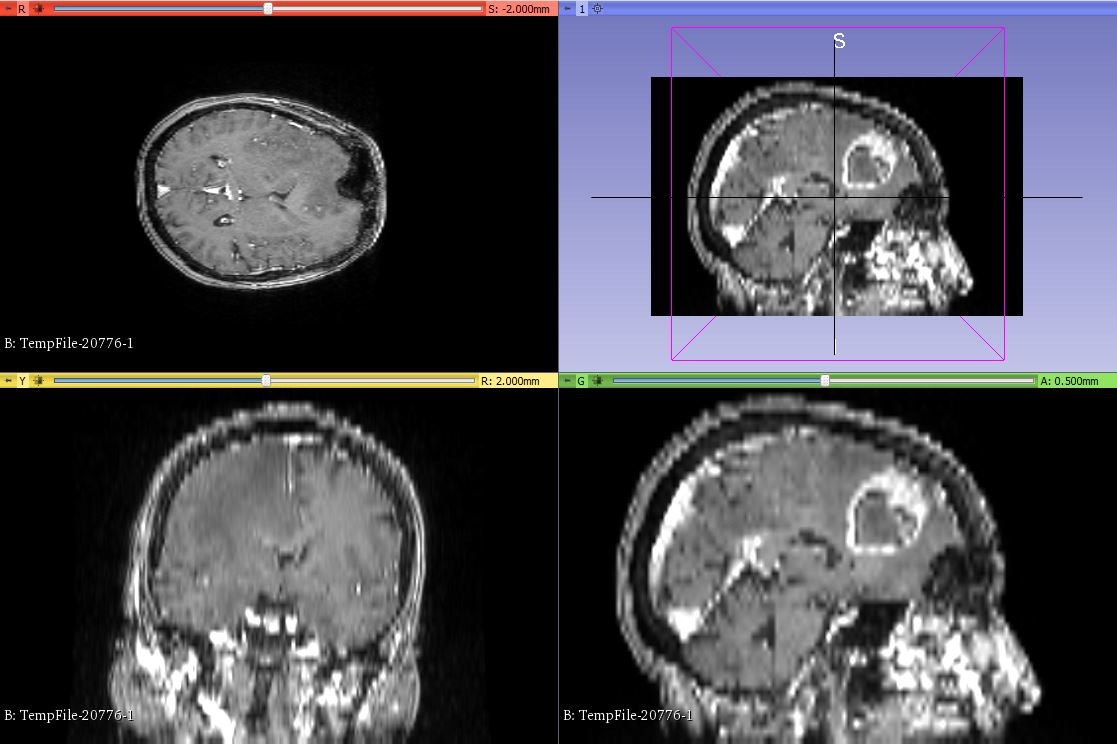

<h5>Part 1b</h5>

In [32]:
#Calculate physical extent of image using sitk spacing, size, and origin functions 
imageDimensions(img, img_name)

#Calculate physical extent of image using TransformIndexToPhysicalPoint function
transformIndexToPoint(img, img_name)

The physical extent of Intraoperative MRI image is: 280.0 mm x 280.0 mm x 180.0 mm.
The physical extent of Intraoperative MRI image is: 280.0 mm x 280.0 mm x 180.0 mm.


Both methods for calculating the physical extent of the image yield the same results. However, when using the TransfromIndexToPhysicalPoint function, the origin of the image is required as an input; wehereas the first method is successful without information about the origin.

<h5>Part 1c</h5>

For the original image, the metadata are as follows:<br>
Size: (140, 280, 45)<br>
Spacing: (2.0, 1.0, 4.0)<br>
Origin: (-140.0, -139.5, -90.0)<br>
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)<br>
Pxiel type: 32-bit float<br>

By changing the voxel size to 0.5 x 0.5 x 0.5, the spacing of the resampled image will change to 0.5, 0.5, 0.5. This will change the size of the image, as each voxel will become smaller. Therefore, the size of the new image will be: (140x2/0.5), (280x1/0.5), (45x4/0.5). The origin of the image would be set to 0,0,0 by default, however I will set it to be the same as the original image so that the resampled image can be viewed in the same physical space. The image itself isn't changing, I am just reducing the size of each individual voxel, therefore, the direction and pixel type should remain unchanged.

Thus, the metadata for the new image should be as follows:<br>
Size: (560, 560, 360)<br>
Spacing: (0.5, 0.5, 0.5)<br>
Origin: (-140.0, -139.5, -90.0)<br>
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)<br>
Pxiel type: 32-bit float<br>

<h5>Part 1d</h5>

In [33]:
#up-sample image volume with isotropic voxel spacing
new_spacing = (0.5,0.5,0.5)
img_resampled = data_resample(img,new_spacing)

#View image in 3D Slicer
external_viewer.Execute(img_resampled)

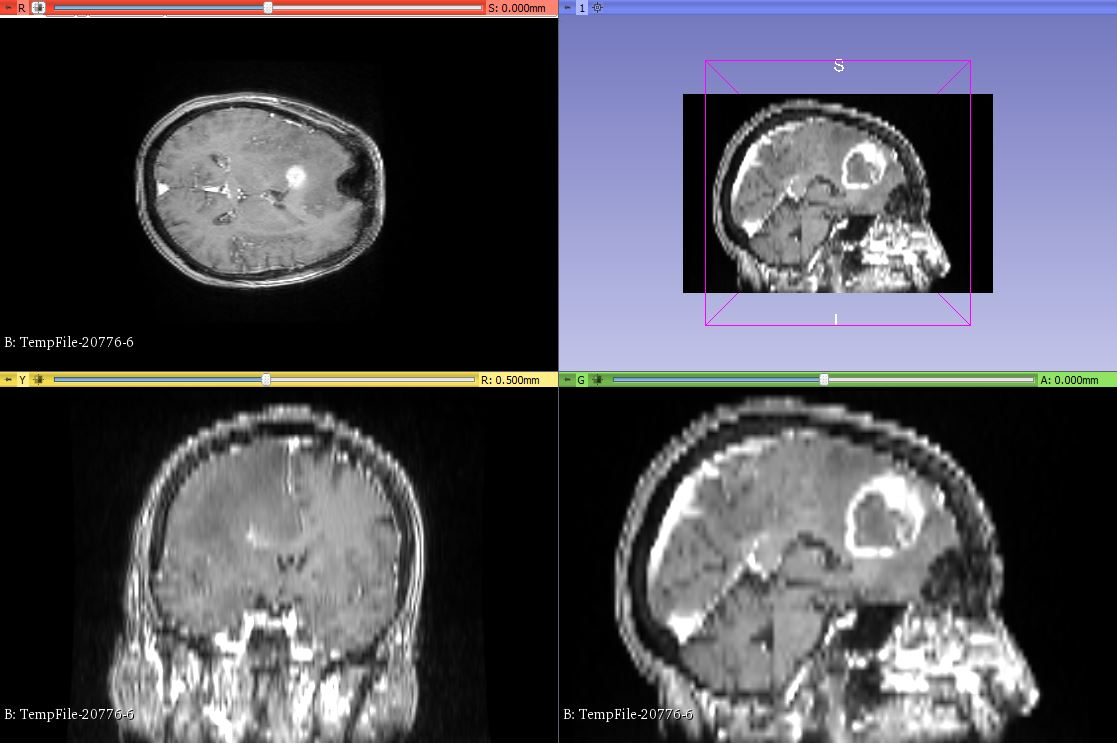

<h5>Part 1e</h5>

In [34]:
#Get metadata for resampled image
resampled_img_name = "Resampled Intraoperative MRI"
image_Info(img_resampled, resampled_img_name)

For image: Resampled Intraoperative MRI
The size is: (560, 560, 360)
The spacing is: (0.5, 0.5, 0.5)
The origin is: (-140.0, -139.5, -90.0)
The direction is: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
The pxiel type is: 32-bit signed integer



The metadata for the resampled image match with what was predicted in part 1c.

<h2>Part 2</h2>

<h5>Part 2a</h5>

In [35]:
def rotateImage(image,angle):
    """
    Rotate an image in the LP plane
    :param image: image object to transform
    :param angle: angle to rotate image by
    :return: rotated image object
    """
    
    theta = np.deg2rad(angle)
    
    size = img.GetSize() 
    spacing = img.GetSpacing()
    origin = img.GetOrigin()
    
    #Find the coordinates of the middle of the volume
    cent1 = spacing[0] * size[0]/2 + origin[0]
    cent2 = spacing[1] * size[1]/2 + origin[1]
    cent3 = spacing[2] * size[2]/2 + origin[2]
    
    transform = sitk.Euler3DTransform()
    transform.SetRotation(0,0,theta)
    transform.SetCenter((cent3,cent2,cent1))
    
    img_rotated = sitk.Resample(image,image,transform,sitk.sitkLinear)
    return img_rotated

In [36]:
def translateImage(image):
    """
    Translate an image 10 mm towards R, 10 mm towards P, and 10 mm towards S
    :param image: image object to transform
    :return: translated image object
    """
    transform = sitk.Euler3DTransform()
    transform.SetTranslation((10,-10,-10))
    
    img_translated = sitk.Resample(image,image,transform,sitk.sitkLinear)
    return img_translated

<h5>Part 2b</h5>

In [37]:
#Rotate image
angle = 90
img_rotated = rotateImage(img_resampled,angle)

#Tranlate image
img_translated = translateImage(img_rotated)

In [38]:
#Translate image
img_translated2 = translateImage(img_resampled)

#Rotate image
angle = 90
img_rotated2 = rotateImage(img_translated2,angle)

<h5>Part 2c</h5>

In [39]:
#View images in 3D Slicer
external_viewer.Execute(img_translated)
external_viewer.Execute(img_rotated2)

Rotated then translated:
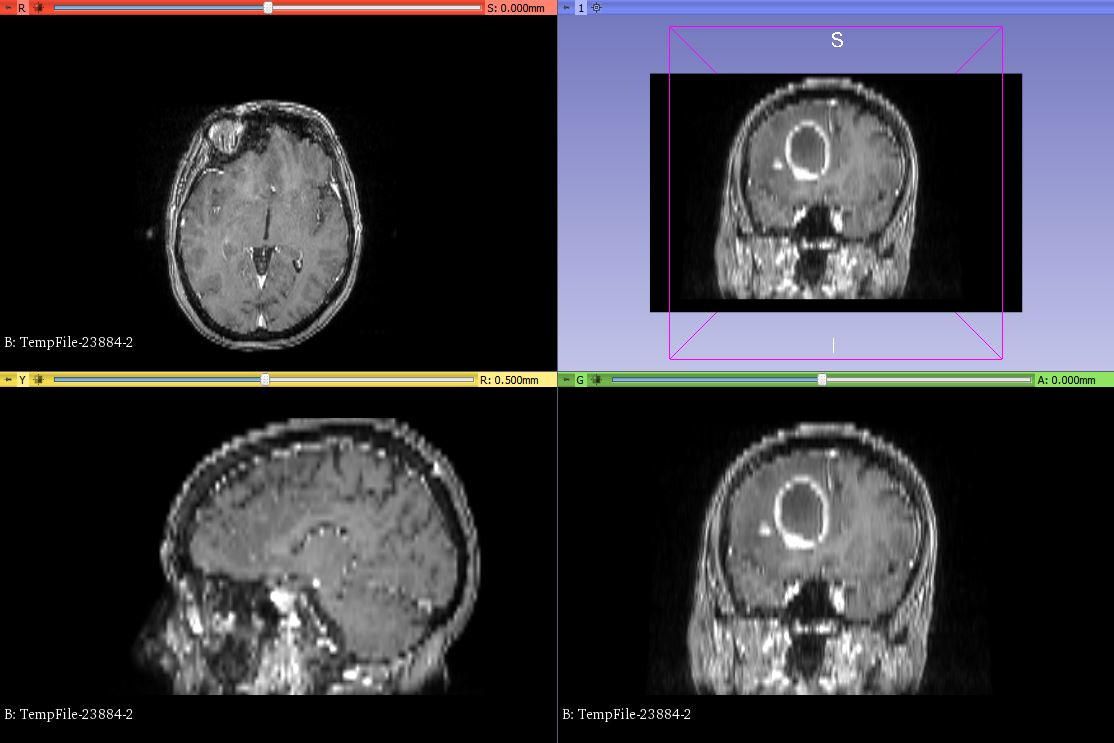

Translated then rotated:
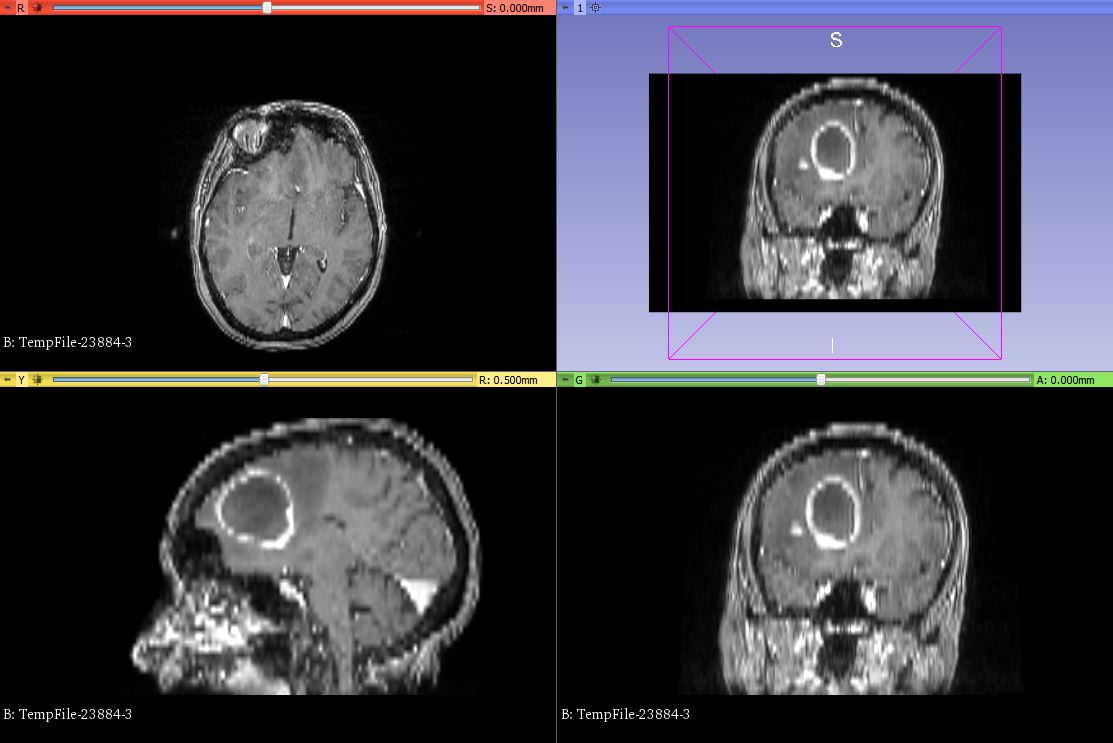

The images are slightly different. The final volume is sensitive to the order of transformations, because the transformations are done with respect to the origin or a center point. Thus, for example, rotating an object when it is centered vs rotating it when it has been translated away from the center point, will result in different outputs.

<h2>Part 3</h2>

<h5>Part 3a</h5>

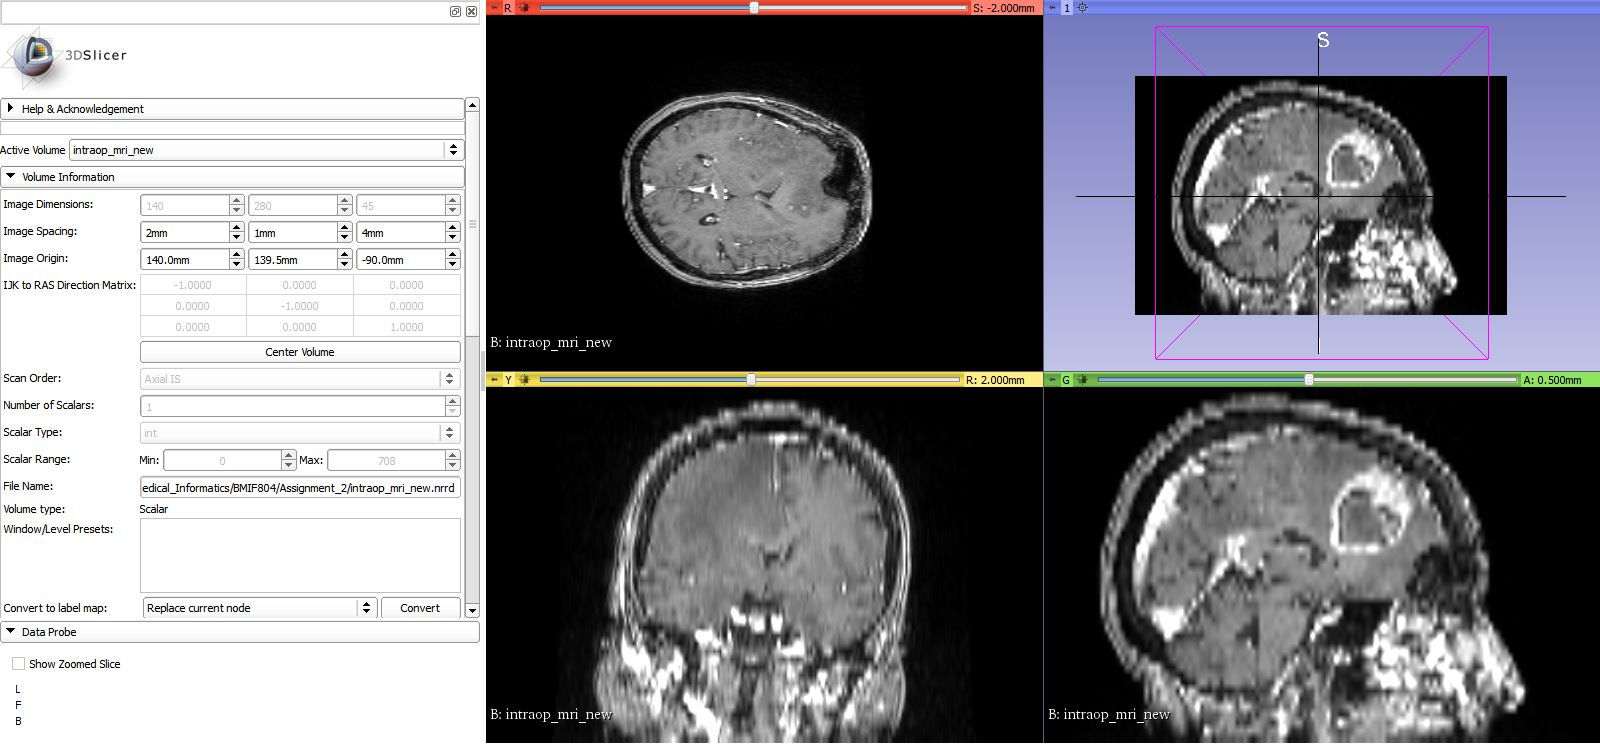

The metadata match what was calculated in part 1a, with the exception of the directions of the first two origin coordinates and directions. This is simply because 3D Slicer uses an RAS cordinate system, whereas Simple ITK uses LPS.

<h5>Part 3b</h5>

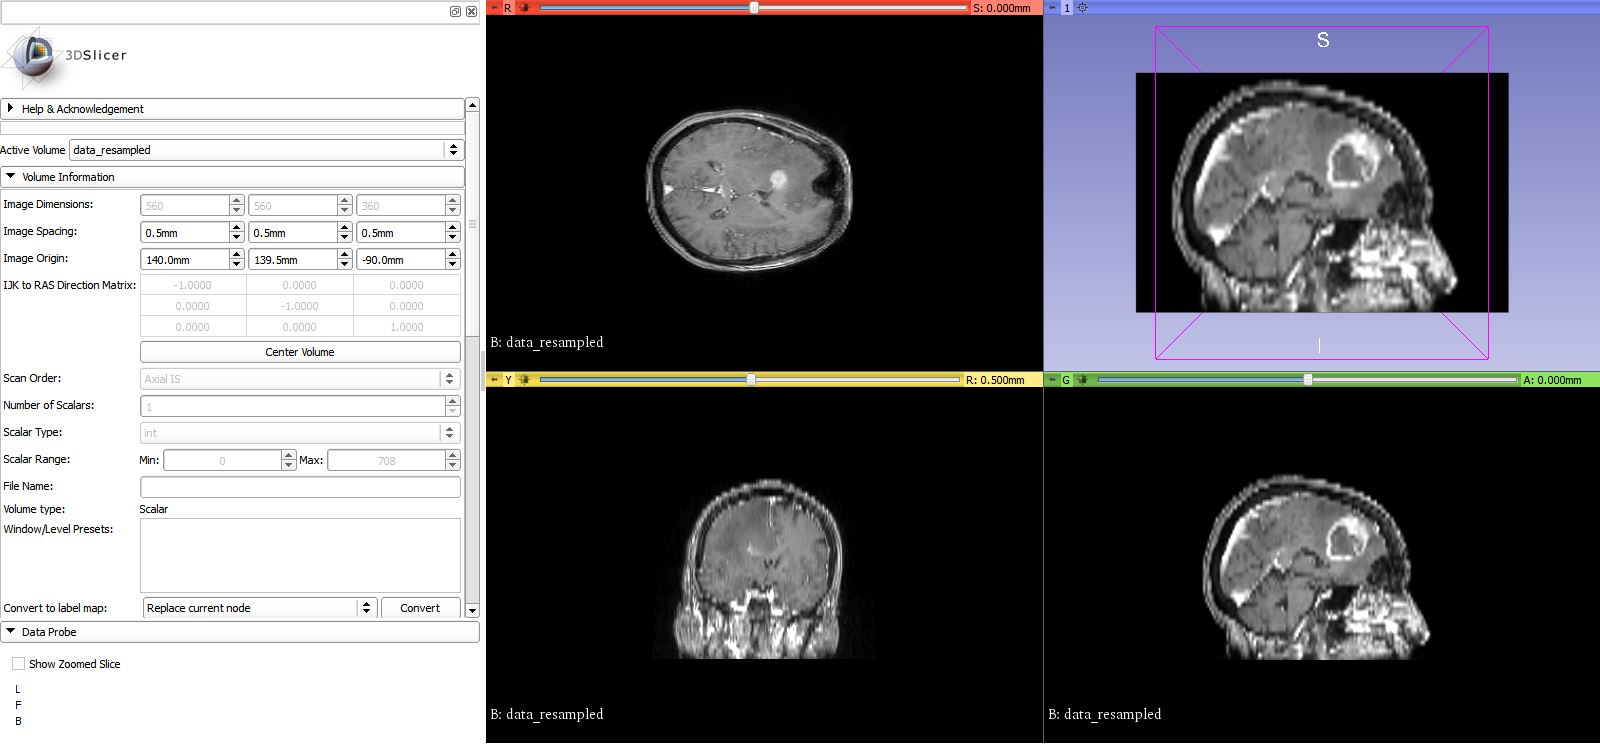

The metadata match what was calculated in part 1e, again with the exception of some directionalities, due to the difference between the RAS and LPS coordinate systems.

<h5>Part 3c</h5>

In 3D Slicer, I rotated and then translated the resampled image:

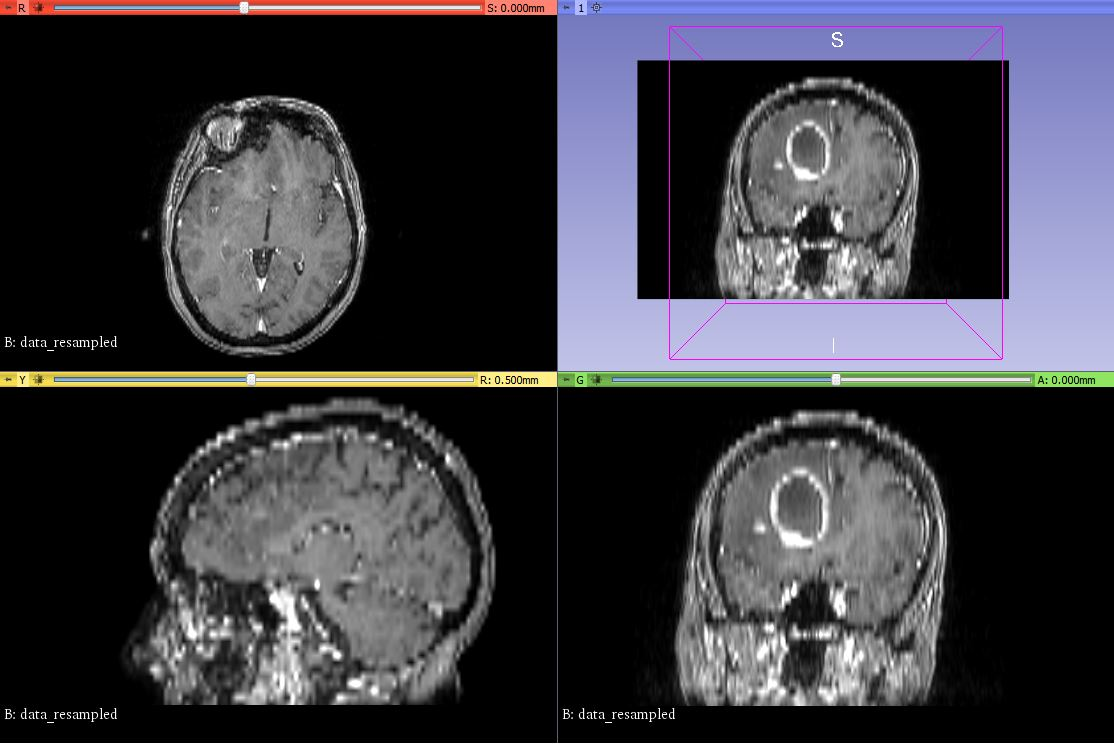

In 3D Slicer, I translated and then rotated the resampled image:

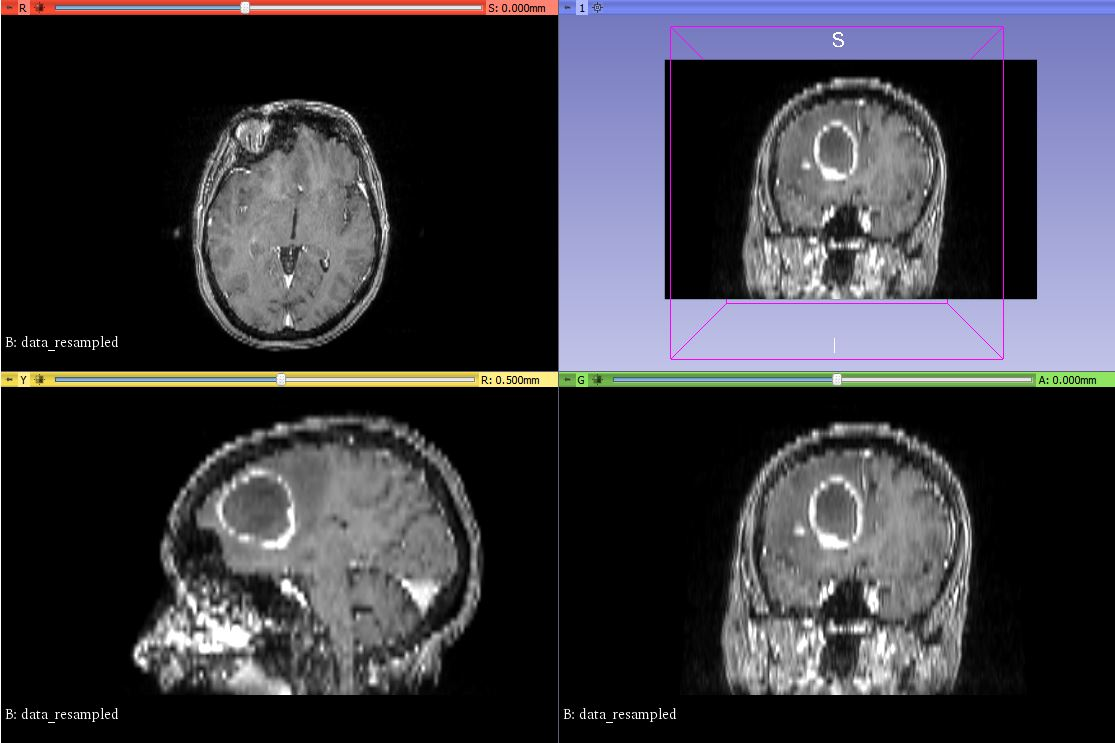

The images that were rotated and then translated look the same in 3D Slicer and Simple ITK, as do the images that were translated and then rotated.